In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [307]:
sns.set(rc={'figure.figsize':(10,10)})

In [2]:
import requests
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=RELIANCE.BSE&outputsize=full&apikey=AFC0Y2XFMYXGIP0K'
r = requests.get(url)


In [310]:
data = r.json()

In [311]:
data

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events',
  '2. Symbol': 'RELIANCE.BSE',
  '3. Last Refreshed': '2023-01-03',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2023-01-03': {'1. open': '2567.7',
   '2. high': '2573.0',
   '3. low': '2548.05',
   '4. close': '2557.0',
   '5. adjusted close': '2557.0',
   '6. volume': '136124',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0'},
  '2023-01-02': {'1. open': '2556.8999',
   '2. high': '2580.0',
   '3. low': '2548.2',
   '4. close': '2575.1499',
   '5. adjusted close': '2575.1499',
   '6. volume': '174612',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0'},
  '2022-12-30': {'1. open': '2547.0',
   '2. high': '2576.8999',
   '3. low': '2542.55',
   '4. close': '2548.2',
   '5. adjusted close': '2548.2',
   '6. volume': '77470',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0'},
  '2022-12-29': {'1. ope

In [312]:
df = pd.DataFrame.from_dict(data['Time Series (Daily)'])

In [313]:
df = df.T
df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2023-01-03,2567.7,2573.0,2548.05,2557.0,2557.0,136124,0.0000,1.0
2023-01-02,2556.8999,2580.0,2548.2,2575.1499,2575.1499,174612,0.0000,1.0
2022-12-30,2547.0,2576.8999,2542.55,2548.2,2548.2,77470,0.0000,1.0
2022-12-29,2532.05,2549.0,2526.5,2542.55,2542.55,157229,0.0000,1.0
2022-12-28,2535.8999,2549.8999,2521.25,2544.45,2544.45,168925,0.0000,1.0
...,...,...,...,...,...,...,...,...
2005-01-07,394.7115,409.2889,394.3751,404.3176,86.8678,16969845,0.0000,1.0
2005-01-06,392.469,401.0658,390.6747,393.1791,84.4746,13446517,0.0000,1.0
2005-01-05,392.8427,399.197,385.9277,396.1319,85.1091,16954266,0.0000,1.0
2005-01-04,399.9444,407.3827,395.8329,396.8048,85.2536,10059943,0.0000,1.0


In [314]:
#function to rename dataframe columns
def rename(data):
  data = data.rename(columns = {
      '1. open': 'open',
      '2. high': 'high',
      '3. low': 'low',
      '4. close': 'close',
      '5. adjusted close':'adjClose',
      '6. volume': 'volume',
      '7. dividend amount':'divident',
      '8. split coefficient': 'split_coeff'
  })
  return data

In [315]:
df = rename(df)
df['date'] = df.index
df.reset_index(drop=True,inplace=True)
df = df[['date','open','close','low','high','adjClose','volume','divident','split_coeff']]

In [316]:
df.date= df.date.str.strip()
df.open= df.open.str.strip()
df.close= df.close.str.strip()
df.low= df.low.str.strip()
df.high= df.high.str.strip()
df.adjClose= df.adjClose.str.strip()
df.volume= df.volume.str.strip()
df.divident= df.divident.str.strip()
df.split_coeff= df.split_coeff.str.strip()

In [317]:
df.head()

,date,open,close,low,high,adjClose,volume,divident,split_coeff
0,2023-01-03,2567.7,2557.0,2548.05,2573.0,2557.0,136124,0.0000,1.0
1,2023-01-02,2556.8999,2575.1499,2548.2,2580.0,2575.1499,174612,0.0000,1.0
2,2022-12-30,2547.0,2548.2,2542.55,2576.8999,2548.2,77470,0.0000,1.0
3,2022-12-29,2532.05,2542.55,2526.5,2549.0,2542.55,157229,0.0000,1.0
4,2022-12-28,2535.8999,2544.45,2521.25,2549.8999,2544.45,168925,0.0000,1.0


In [318]:
from datetime import datetime 
df['date'] = pd.to_datetime(df['date'])
df['open'] = df['open'].astype('float').astype('int64')
df['close'] = df['close'].astype('float').astype('int64')
df['low'] = df['low'].astype('float').astype('int64')
df['high'] = df['high'].astype('float').astype('int64')
df['adjClose'] = df['adjClose'].astype('float').astype('int64')
df['volume'] = df['volume'].astype('float').astype('int64')
df['divident'] = df['divident'].astype('float').astype('int64')
df['split_coeff'] = df['split_coeff'].astype('float').astype('int64')

In [319]:
# Create a copy of the dataset for backup purposes.
data_reserve = df.copy()

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4437 non-null   datetime64[ns]
 1   open         4437 non-null   int64         
 2   close        4437 non-null   int64         
 3   low          4437 non-null   int64         
 4   high         4437 non-null   int64         
 5   adjClose     4437 non-null   int64         
 6   volume       4437 non-null   int64         
 7   divident     4437 non-null   int64         
 8   split_coeff  4437 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 312.1 KB


In [321]:
df.describe()

,open,close,low,high,adjClose,volume,divident,split_coeff
count,4437.000000,4437.000000,4437.000000,4437.000000,4437.000000,4.437000e+03,4437.000000,4437.000000
mean,1318.000902,1317.419202,1299.890241,1335.822853,783.620239,3.141326e+06,0.016903,1.000451
std,611.876161,611.936308,602.122583,621.817916,691.367152,2.131211e+07,0.287919,0.021229
min,377.000000,374.000000,372.000000,381.000000,80.000000,4.245200e+04,0.000000,1.000000
25%,890.000000,890.000000,880.000000,900.000000,382.000000,4.627700e+05,0.000000,1.000000
50%,1059.000000,1059.000000,1049.000000,1072.000000,469.000000,9.545870e+05,0.000000,1.000000
75%,1710.000000,1713.000000,1696.000000,1733.000000,971.000000,2.773621e+06,0.000000,1.000000
max,3215.000000,3216.000000,3135.000000,3252.000000,2810.000000,8.021841e+08,8.000000,2.000000


# HISTORY REPEATS ITSELF

# A Good Stock is the stock that is consistent and do not show abnormal behaviour from the trend.



* Good Management
* Consistent
* company's valuation and reputation
* Historical Prices
Above are some characteristic of a good stock, we will analyse historical prices of the stock and will predict the future price of the stock.



# Person correlation among the attributes of the data

In [322]:
corr_matrix = df.drop(columns='date',axis=1).corr()

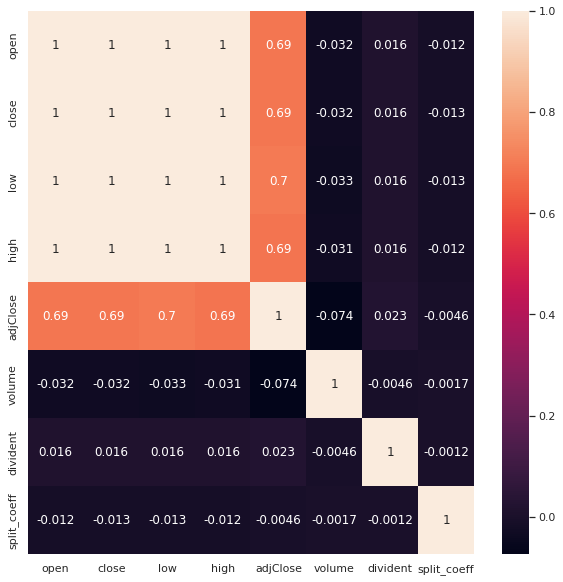

In [323]:
sns.heatmap(corr_matrix,annot=True)

The volume is highly negatively correlated with adjClose.

Corresponding Opening and Closing values of the Stock Price.

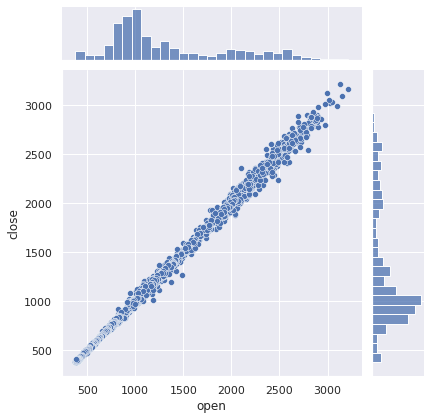

In [324]:
sns.jointplot(x='open',y='close',data=data_reserve)

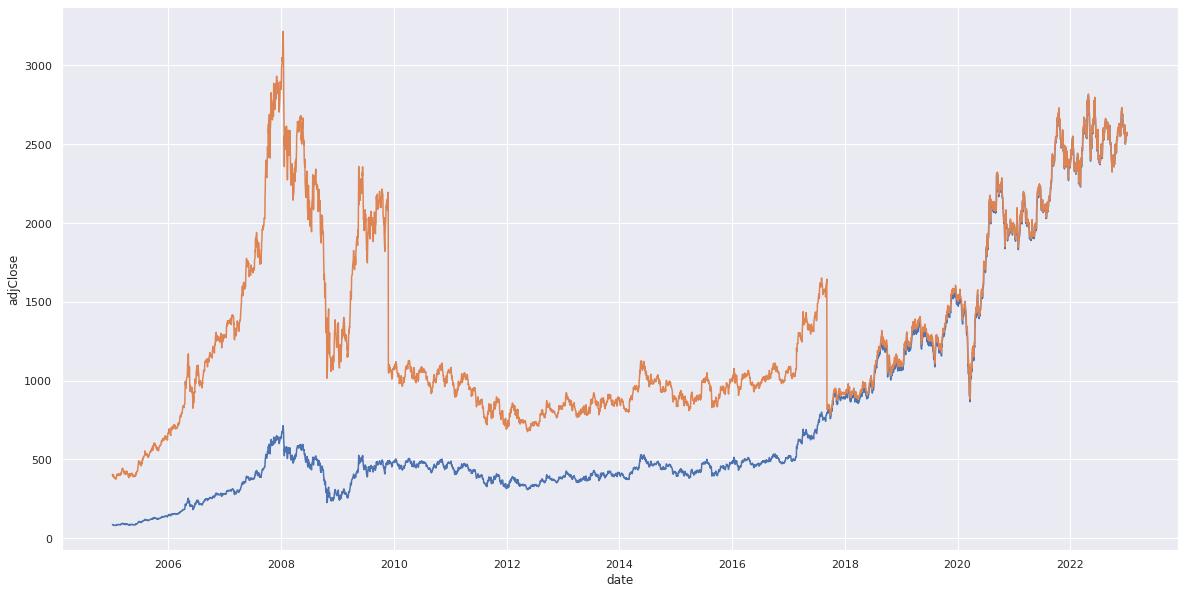

In [326]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x='date',y='adjClose',data=df)
sns.lineplot(x='date',y='close',data=df)

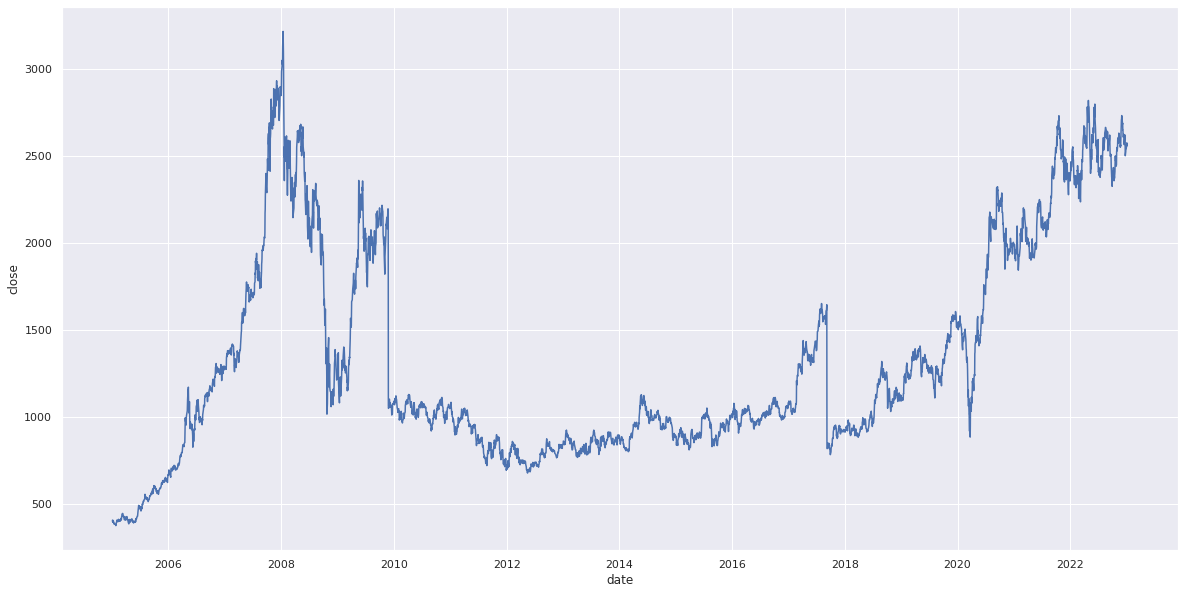

In [327]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x='date',y='close',data=df)

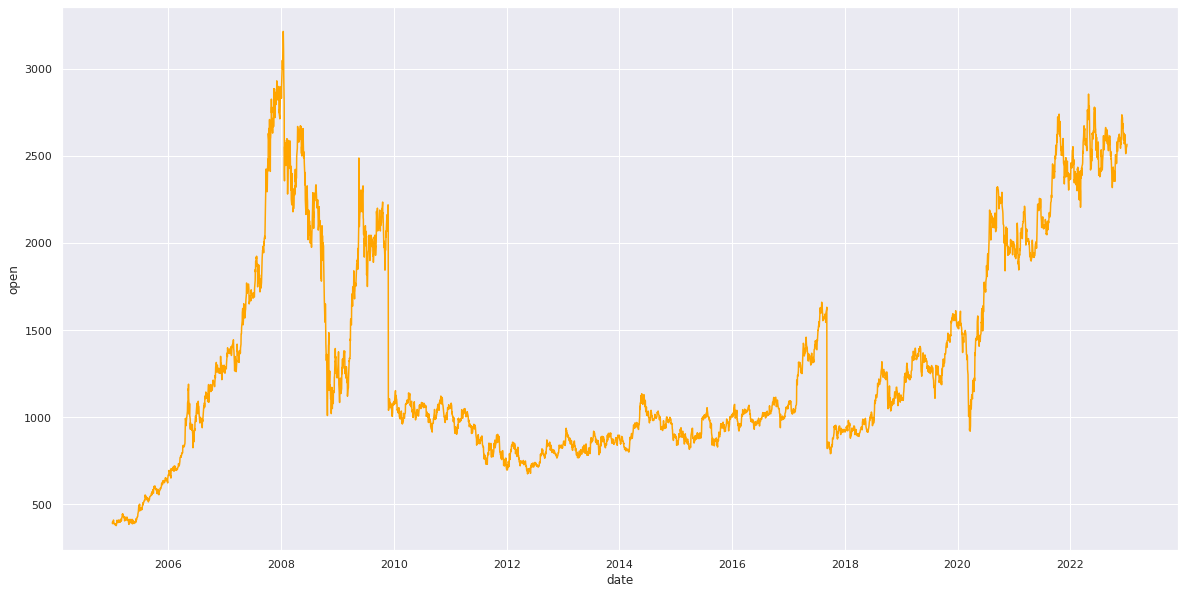

In [328]:
sns.lineplot(x='date',y='open',data=df,color='orange')

* The above two curve shows that there is almost no abnormal behaviour among the opening and closing value of the share price. 
* But at three points the stock price has fallen dramatically.
  *  First near the year 2008
  *  second, near the year 2010
  * third, near 2017-2018

* Lets analyse it.

In [260]:
#checking for any split of the share price
df[(df.split_coeff >1)]

,date,open,close,low,high,adjClose,volume,divident,split_coeff
1313,2017-09-07,823,818,816,832,793,645101,0,2
3230,2009-11-26,1099,1064,1056,1109,477,2274918,0,2


This explains that the company issued 1:1 bonus for all the shareholders. That means the company doubled the share but decrease the share value by the corresponding ratio. 
This doesn't mean loss to the shareholders.
* This explains the stock price decrese on the date 2017-09-07 and 2009-11-06.

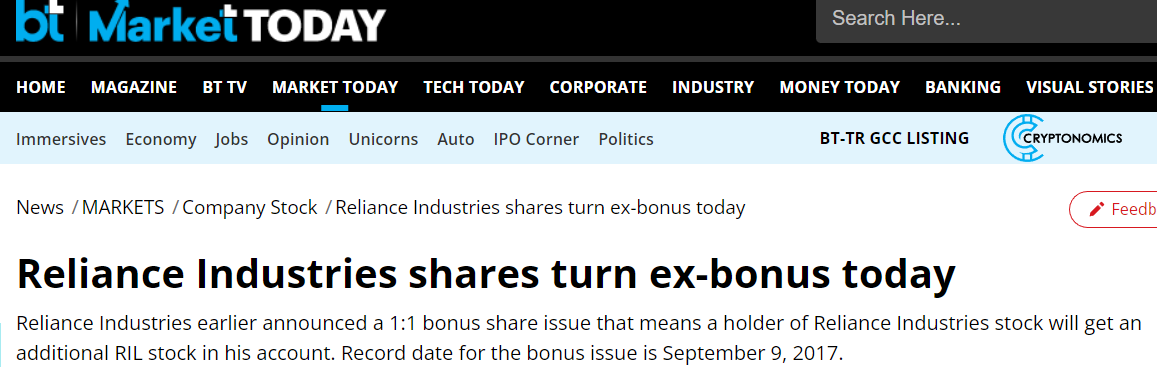

In [329]:
# Analysis of the drop of the stock price near the year 2008
df[(df.open == df.open.max())]

,date,open,close,low,high,adjClose,volume,divident,split_coeff
3683,2008-01-15,3215,3161,3135,3252,702,3621642,0,1


There is no stock split (since split_coeff=1). So we can neglect the stock split reason. 
Since the year is 2008, I can assume that the price of the stock fell due to the **Global Recession of 2008**.

# Change in the stock price on each day

In [330]:
df['change'] = df['close'] - df['open']
df.head()

,date,open,close,low,high,adjClose,volume,divident,split_coeff,change
0,2023-01-03,2567,2557,2548,2573,2557,136124,0,1,-10
1,2023-01-02,2556,2575,2548,2580,2575,174612,0,1,19
2,2022-12-30,2547,2548,2542,2576,2548,77470,0,1,1
3,2022-12-29,2532,2542,2526,2549,2542,157229,0,1,10
4,2022-12-28,2535,2544,2521,2549,2544,168925,0,1,9


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


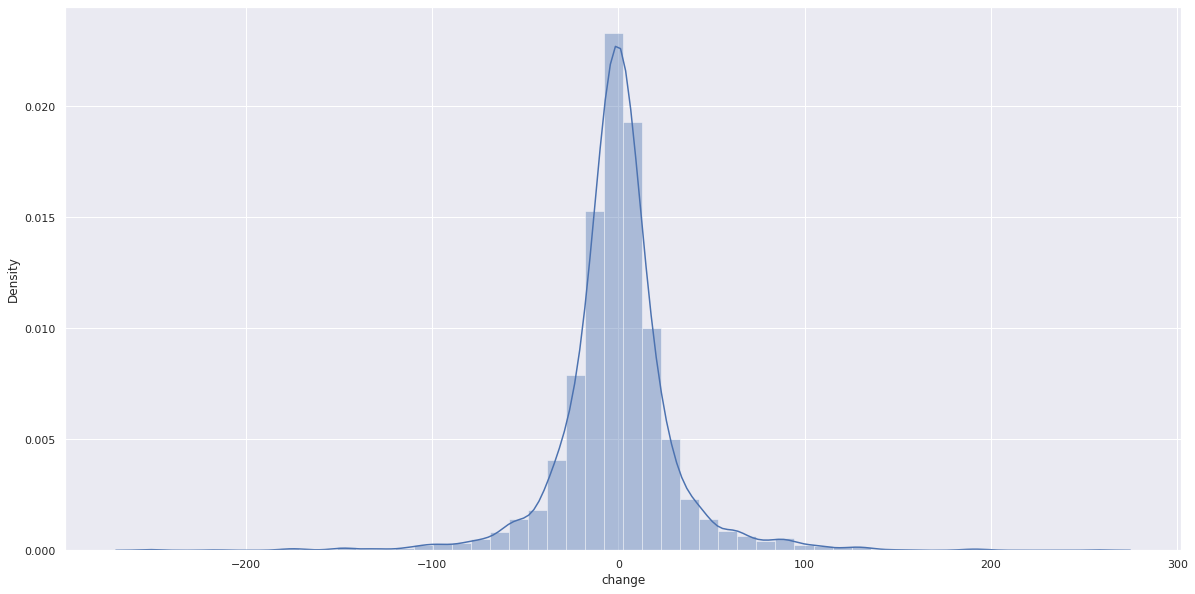

In [331]:
sns.distplot(df.change)

# Statistical Testing

In [332]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

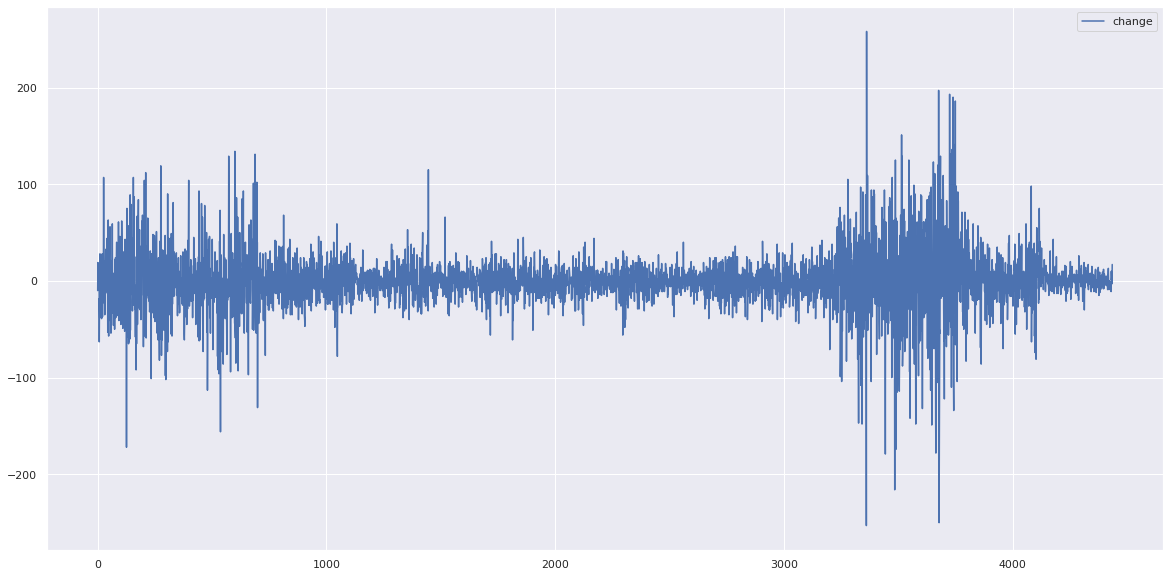

In [333]:
df.change.plot(legend=True)

The above curve can be interpreted as **Stationary **
But we cannot say anything without any Hypothesis testing. 
* For hypothesis testing use Augumented Dicker Fuller test

# Rolling Statistics Tests:
* This method gave a visual representation of the data to define its stationarity.
*  A Moving variance or moving average graph is plot and then it is observed whether it varies with time or not. 
* The mean, variance, standard deviation should be constant for the time intervals.

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4432   -3.083333
4433   -2.666667
4434   -1.583333
4435   -1.833333
4436   -0.333333
Name: change, Length: 4437, dtype: float64 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4432    5.484828
4433    5.597619
4434    5.517877
4435    5.507571
4436    7.749878
Name: change, Length: 4437, dtype: float64


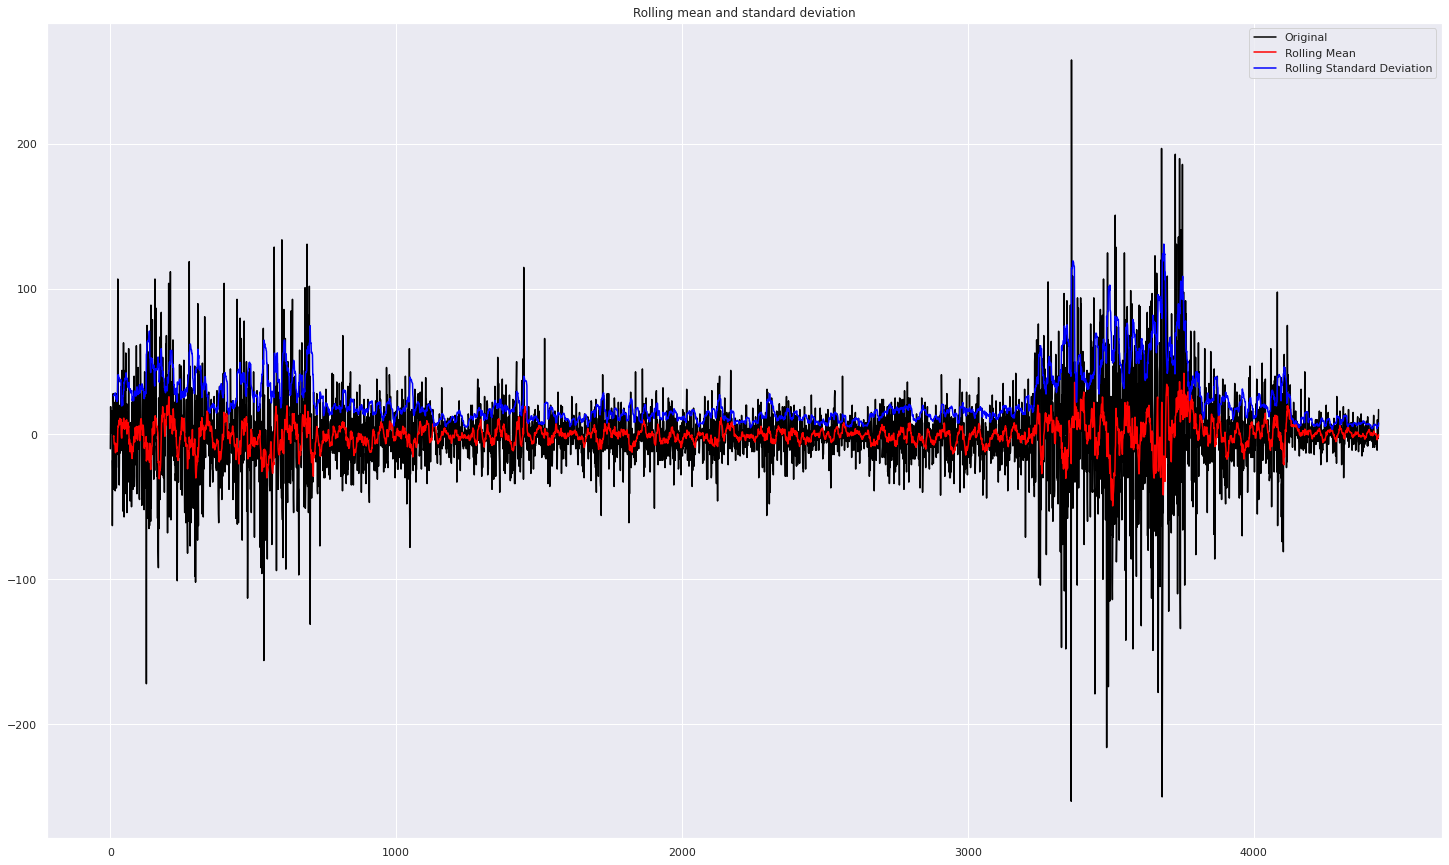

In [266]:
rmean=df.change.rolling(window=12).mean()
rstd=df.change.rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(df.change , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

The black line represents the plot of **'Change in the stock price on each day'** The red one represents the **rolling mean** and blue line represents the **rolling standard deviation.** From the figure, it represents that the our dataset is **stationary**. But we cannot conclude as of yet. So lets check for the   

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4432    386.083333
4433    387.666667
4434    389.166667
4435    390.333333
4436    392.166667
Name: close, Length: 4437, dtype: float64 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4432    8.436483
4433    7.714606
4434    7.408022
4435    7.278028
4436    7.998106
Name: close, Length: 4437, dtype: float64


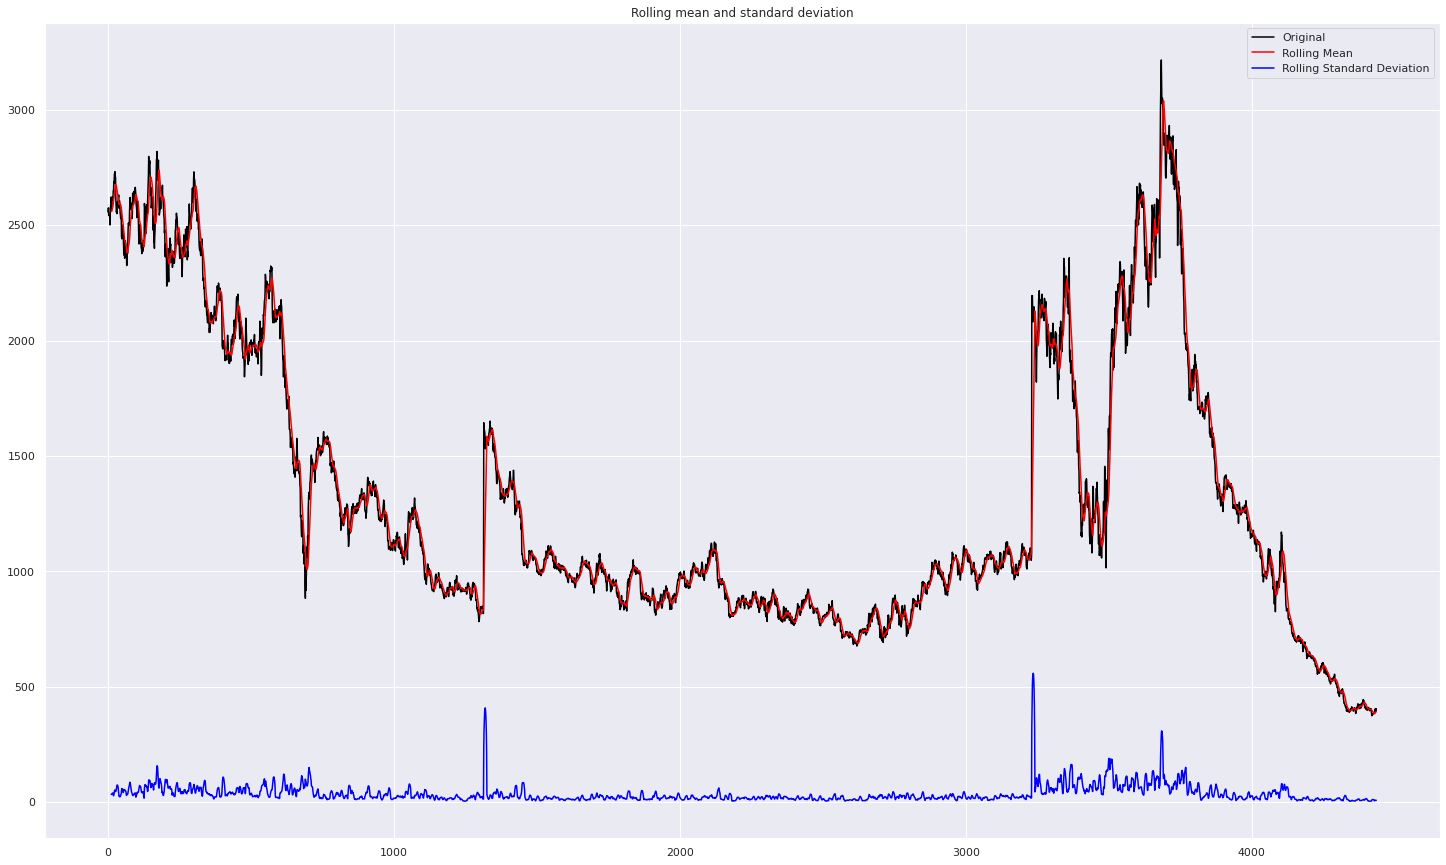

In [267]:
rmean=df.close.rolling(window=12).mean()
rstd=df.close.rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(df.close , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4432    389.166667
4433    390.333333
4434    390.750000
4435    392.166667
4436    392.500000
Name: open, Length: 4437, dtype: float64 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4432    8.504901
4433    7.761599
4434    7.700354
4435    7.505553
4436    7.192167
Name: open, Length: 4437, dtype: float64


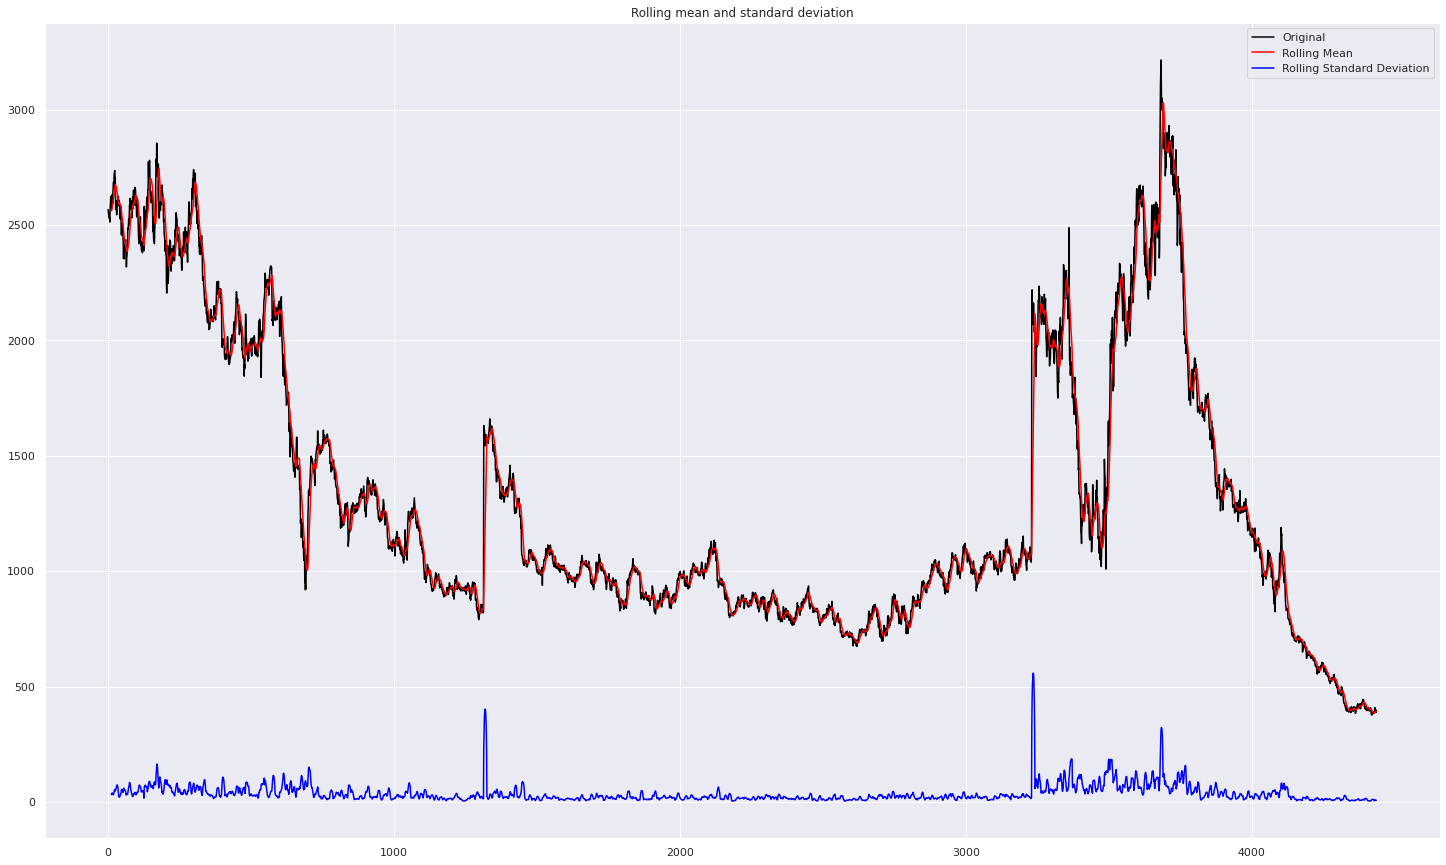

In [268]:
rmean=df.open.rolling(window=12).mean()
rstd=df.open.rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(df.open , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

The **rolling mean of the closing price and opening price ** is **Stationary** but the **Standard deviation of the closing price and opening price** is **Non-Stationary**. 

# Augumented Dicker fulller test

In [269]:
from statsmodels.tsa.stattools import adfuller
def augumented_dicker_fuller_test(data):
    print("Observations of Dickey-fuller test")
    dftest = adfuller(data,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key]= value
    print(dfoutput)

In [270]:
print("Augumented Dicker fuller test for df['change']\n")
augumented_dicker_fuller_test(df.change)
print("Augumented Dicker fuller test for df['Open']\n")
augumented_dicker_fuller_test(df.open)
print("Augumented Dicker fuller test for df['Close']\n")
augumented_dicker_fuller_test(df.close)

Augumented Dicker fuller test for df['change']

Observations of Dickey-fuller test
Test Statistic                -1.322891e+01
p-value                        9.674237e-25
#lags used                     2.000000e+01
number of observations used    4.416000e+03
critical value (1%)           -3.431832e+00
critical value (5%)           -2.862195e+00
critical value (10%)          -2.567119e+00
dtype: float64
Augumented Dicker fuller test for df['Open']

Observations of Dickey-fuller test
Test Statistic                   -2.437960
p-value                           0.131308
#lags used                       27.000000
number of observations used    4409.000000
critical value (1%)              -3.431834
critical value (5%)              -2.862196
critical value (10%)             -2.567119
dtype: float64
Augumented Dicker fuller test for df['Close']

Observations of Dickey-fuller test
Test Statistic                   -2.124305
p-value                           0.234854
#lags used                   

* The above result shows that the **Test Statistics** for df['change'] is less than the Critical values, hence we can reject the null hypothesis and hence the df['change'] is stationary.

* Also, the df['close'] and df['open'] are not stationary because the **Test Statistics** value is greater than the critical values.

# Transformation of Non Stationary data to Stationary

* Different Methods that can be used to tranform are:
  * Log transforming of the data
  * Taking the square root of the data
  * Taking the cube root
  * Proportional change

In [271]:
#We can do hit and trial for that
from scipy.signal import detrend
def detrending(data,date):
  test = pd.DataFrame(columns=['open'])
  test['open'] = data
  test.set_index(date,inplace = True)
  test = detrend(test)
  new = pd.DataFrame(test,columns=['open'])
  return new.open

In [272]:
#detrending the columns ['open','close','low','high']
df.open = detrending(df.open,df.date)
df.close = detrending(df.close,df.date)
df.low = detrending(df.low,df.date)
df.high = detrending(df.high,df.date)

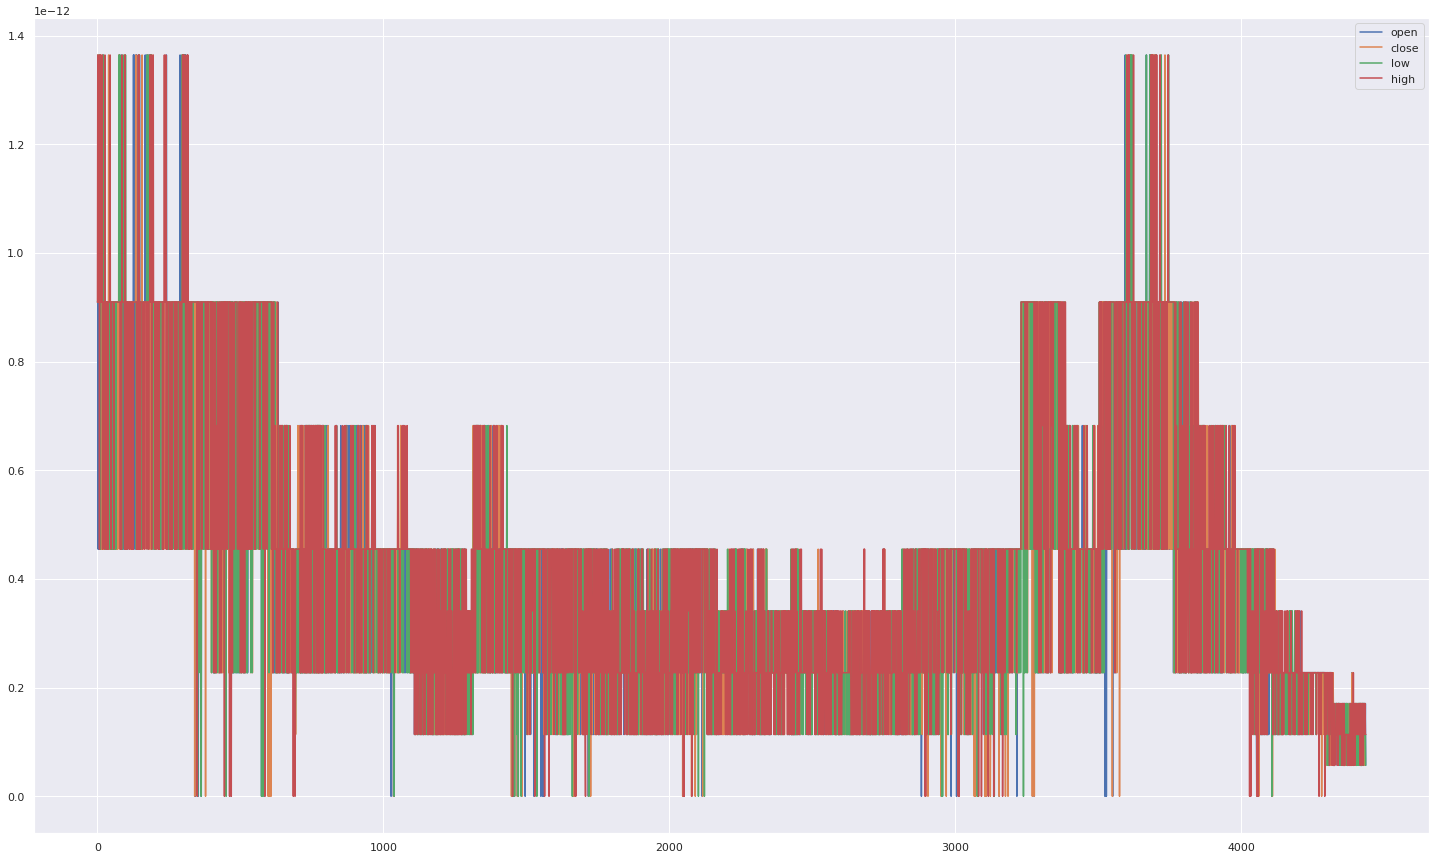

In [273]:
for i in ['open','close','low','high']:
  df[i].plot(legend=True)

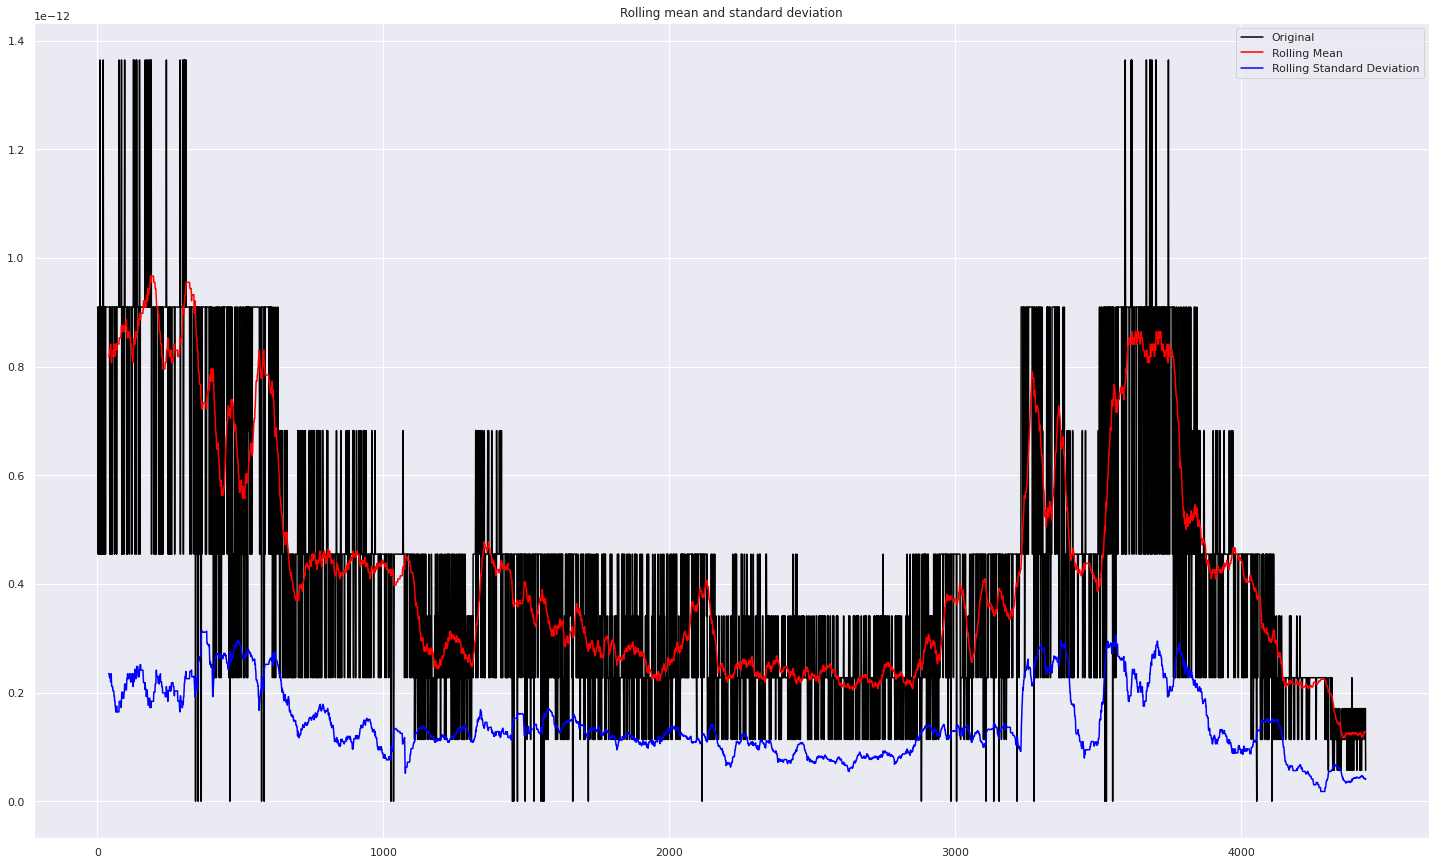

In [274]:
rmean=df.open.rolling(window=40).mean()
rstd=df.open.rolling(window=40).std()
#print(rmean,rstd)
orig=plt.plot(df.open, color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

Now all the attributes of the dataset are **Stationary**. Hence can be used in the time series prediction.

# Risk Analysis

Risk analysis seeks to identify, measure, and mitigate various risk exposures or hazards facing a business, investment, or project.

Monte Carlo Method is used for the analysis.The frequencies of different outcomes generated by this simulation will form a normal distribution, that is, a bell curve. The most likely return is in the middle of the curve, meaning there is an equal chance that the actual return will be higher or lower.

The probability that the actual return will be within one standard deviation of the most probable ("expected") rate is 68%. The probability that it will be within two standard deviations is 95%, and that it will be within three standard deviations 99.7%. 




In [303]:
import random
def risk_analysis(data):
  # Set the 'date' column as the index of the DataFrame
  data.set_index('date', inplace=True)

  # Calculate the log returns of the stock
  data['returns'] = np.log(data['open']).diff()

  # Number of simulations
  n_simulations = 500

  # Number of days to simulate
  n_days = 365

  # Initialize a list to store the results of each simulation
  simulation_results = []

  # Loop over the number of simulations
  for i in range(n_simulations):
    # Initialize a list to store the daily returns for this simulation
    daily_returns = []
    
    # Set the starting price of the stock
    price = data['open'][-1]
    
    # Loop over the number of days
    for j in range(n_days):
      # Generate a random return for the stock
      random_return = random.gauss(data['returns'].mean(), data['returns'].std())
      
      # Calculate the new price of the stock
      price *= np.exp(random_return)
      
      # Add the daily return to the list
      daily_returns.append(random_return)
    
    # Add the final price of the stock to the list of simulation results
    simulation_results.append(price)

  # Calculate the probability of achieving a certain price
  threshold = 1500
  probability = sum(1 for x in simulation_results if x > threshold) / len(simulation_results)

  print(f'The probability of the stock price exceeding {threshold:.2f} after {n_days} days is {probability:.2f}')


In [306]:
data = data_reserve.copy()
risk_analysis(data)

The probability of the stock price exceeding 1500.00 after 365 days is 0.01


# [-Updates] Code for Predicting the price of the stock using Deep Learning.